# Assignment 3:  ridge regression

Vignesh M. Pagadala

## Preliminaries 

In this assignment you will explore ridge regression applied to the task of predicting wine quality.
You will use the [wine quality](http://archive.ics.uci.edu/ml/datasets/Wine+Quality)
dataset from the UCI machine learning repository, and compare accuracy obtained using ridge regression to the results from a [recent publication](http://www.sciencedirect.com/science/article/pii/S0167923609001377#).
If you have trouble accessing that version of the paper, here's a link to a [preprint](http://www3.dsi.uminho.pt/pcortez/wine5.pdf).
The wine data is composed of two datasets - one for white wines, and one for red wines.  In this assignment perform all your analyses on just the red wine data.

The features for the wine dataset are not standardized, so make sure you do this, especially since we are going to consider the magnitude of the weight vector (recall that standardization entails subtracting the mean and then dividing by the standard deviation for each feature; you can use  Numpy/scikit-learn to perform this computation.


In [26]:
import numpy as np
from sklearn.model_selection import GridSearchCV
import pandas as pd
import matplotlib.pyplot as plt

## Part 1

Implement ridge regression in a class called RidgeRegression that implements the classifier API, i.e. ``fit`` and ``predict`` methods with the same signature as the classifiers you implemented in the previous assignment.  Also implement functions for computing the following measures of error:

  * The Root Mean Square Error (RMSE).
  * The Maximum Absolute Deviation (MAD).

For a hypothesis $h$, they are defined as follows:

$$RMSE(h) = \sqrt{\frac{1}{N}\sum_{i=1}^N (y_i - h(\mathbf{x}_i))^2}$$

and

$$MAD(h) = \frac{1}{N}\sum_{i=1}^N |y_i - h(\mathbf{x}_i)|.$$

With the code you just implemented, your next task is to explore the dependence of validation-set error on the value of the regularization parameter, $\lambda$.
In what follows set aside 30% of the data for validation, and compute the in-sample error, and the validation-set error as a function of the parameter $\lambda$ on the red wine data.  Choose the values of $\lambda$ on a logarithmic scale with values 0.01, 0.1, 1, 10, 100, 1000 and plot the RMSE.
Repeat the same experiment where instead of using all the training data, choose 20 random examples out of the training set, and train your model using those 20 examples, while evaluating on the same validation set.

Now answer the following:

  * What is the optimal value of $\lambda$?
  * What observations can you make on the basis of these plots?  (The concepts of overfitting/underfitting should be addressed in your answer).
  * Finally, compare the results that you are getting with the published results in the paper linked above.  In particular, is the performance you have obtained comparable to that observed in the paper?  Please note that for a completely fair comparison, the comparison needs to be made on a separate test set, in the same way the experiment was performed in the paper.


## Ridge Regression Implementation

In [223]:
class RidgeRegression(object):
    
    def __init__(self, lmbda=0.1):
        self.lmbda = lmbda

    def fit(self, X, y):
        C = X.T.dot(X) + self.lmbda*np.eye(X.shape[1])
        self.w = np.linalg.inv(C).dot(X.T.dot(y))
        return self.w
    
    def predict(self, X):
        return X.dot(self.w)
    
    def rmse(self, X, y, w):
        d = y - X.dot(w)
        s = d.T.dot(d)
        error = (s/len(X))**(1/2.0)
        return error
    
    def mad(self, X, y, w):
        d = y - X.dot(w)
        d = np.absolute(d)
        error = np.sum(d)/len(X)
        return error

In [224]:
Xy = np.loadtxt("winequality-red.csv", delimiter=";", skiprows=1)

In [225]:
def standardize(X):
    for i in range(len(X[0])):
        col = X[:, i]
        # Find mean
        mean = np.mean(col)
        # Find SD
        sd = np.std(col)
        # Loop through feature, updating each value.
        for j in range(len(X)):
            X[j,i] = (X[j,i] - mean)/sd
    return X

In [226]:
X = Xy[:, 0:-1]
# Standardize input data
X = standardize(X)
y = Xy[:, -1]

In [227]:
# Split into training (70 %) and validation data (30 %).
nRows = X.shape[0]
nTrain = int(round(0.7*nRows)) 
nTest = nRows - nTrain

# Shuffle row numbers
rows = np.arange(nRows)
np.random.shuffle(rows)

trainIndices = rows[:nTrain]
testIndices = rows[nTrain:]

Xtrain = X[trainIndices, :]
ytrain = y[trainIndices]
Xvalid = X[testIndices, :]
yvalid = y[testIndices]

Insample error and valid-set error for different lambda values.

In [228]:
lvalues = [0.01, 0.1, 1, 10, 100, 1000]
insample = []
validset = []
for l in lvalues:
    ridge = RidgeRegression(lmbda = l)
    w = ridge.fit(Xtrain, ytrain)
    insamp = ridge.rmse(Xtrain, ytrain, w)
    vset = ridge.rmse(Xvalid, yvalid, w)
    insample.append(insamp)
    validset.append(vset)
validset

[5.728392562562446,
 5.728382244774105,
 5.728279437575653,
 5.7272858715132235,
 5.719593068578549,
 5.698025101424351]

Plot

Text(0.5,1,'RMSE for Different Lambda Values')

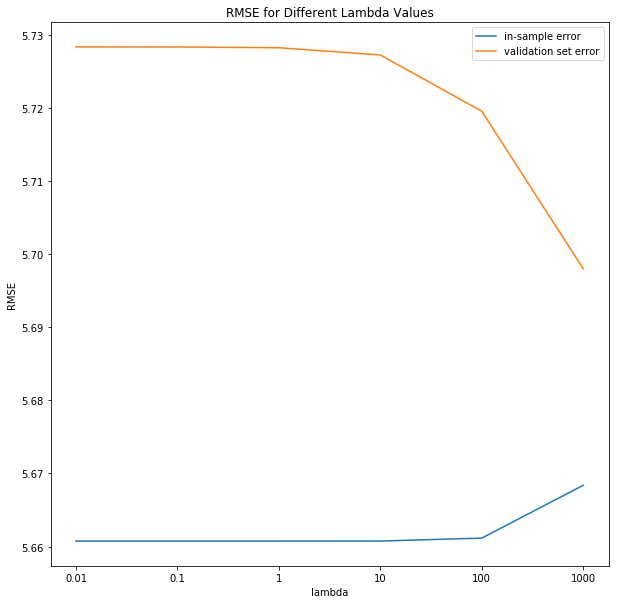

In [229]:
plt.figure(figsize = (10,10))
plt.subplot(1,1,1)
plt.plot(insample, label = "in-sample error")
plt.plot(validset, label = "validation set error")
plt.xticks([0,1,2,3,4,5], lvalues)
plt.legend(loc = "upper right")
plt.xlabel("lambda")
plt.ylabel("RMSE")
plt.title("RMSE for Different Lambda Values")

Plot for 20 random training examples.

In [230]:
Xtrain = X[trainIndices, :]
ytrain = y[trainIndices]

# Choose 20 random train examples
newTrainIndices = np.random.choice(trainIndices, 20)

Xtrain = X[newTrainIndices, :]
ytrain = y[newTrainIndices]
Xvalid = X[testIndices, :]
yvalid = y[testIndices]

In [231]:
lvalues = [0.01, 0.1, 1, 10, 100, 1000]
insample = []
validset = []
for l in lvalues:
    ridge = RidgeRegression(lmbda = l)
    w1 = ridge.fit(Xtrain, ytrain)
    insamp = ridge.rmse(Xtrain, ytrain, w1)
    vset = ridge.rmse(Xvalid, yvalid, w1)
    insample.append(insamp)
    validset.append(vset)

Text(0.5,1,'RMSE for Different Lambda Values')

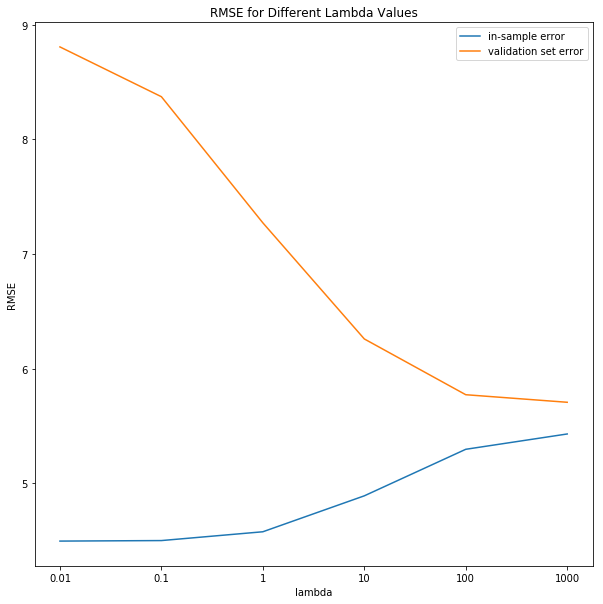

In [232]:
plt.figure(figsize = (10,10))
plt.subplot(1,1,1)
plt.plot(insample, label = "in-sample error")
plt.plot(validset, label = "validation set error")
plt.xticks([0,1,2,3,4,5], lvalues)
plt.legend(loc = "upper right")
plt.xlabel("lambda")
plt.ylabel("RMSE")
plt.title("RMSE for Different Lambda Values")

## Part 2:  regression error characteristic curves

Regression Error Characteristic (REC) curves are an interesting way of visualizing regression error as described
in the following [paper](http://machinelearning.wustl.edu/mlpapers/paper_files/icml2003_BiB03.pdf).
Write a function that plots the REC curve of a regression method, and plot the REC curve of the best regressor you found in Part 1 of the assignment (i.e. the one that gave the lowest error on the validation set).  Plot the REC curve for both the validation set and the training set.
What can you learn from this curve that you cannot learn from an error measure such as RMSE or MAD?



In [267]:
# best regresser was for lambda = 1000
Xtrain = X[trainIndices, :]
ytrain = y[trainIndices]
ridge = RidgeRegression(lmbda = 1000)
w3 = ridge.fit(Xtrain, ytrain)

In [237]:
# REC curve plot function
def plotREC(X, y, w, label):
    # Find absolute deviation for all examples.
    err = (y - X.dot(w)) ** 2
    # Sort in ascending order.
    xaxis = np.sort(err)
    Eprev = 0
    correct = 0
    m = len(xaxis)
    xplot = []
    yplot = []
    for E in xaxis:
        if E > Eprev:
            xplot.append(Eprev)
            yplot.append(correct/m)
            Eprev = E
        correct += 1
    plt.plot(xplot, yplot, label = label)

REC curve for training and validation set.

Text(0.5,1,'REC Curve')

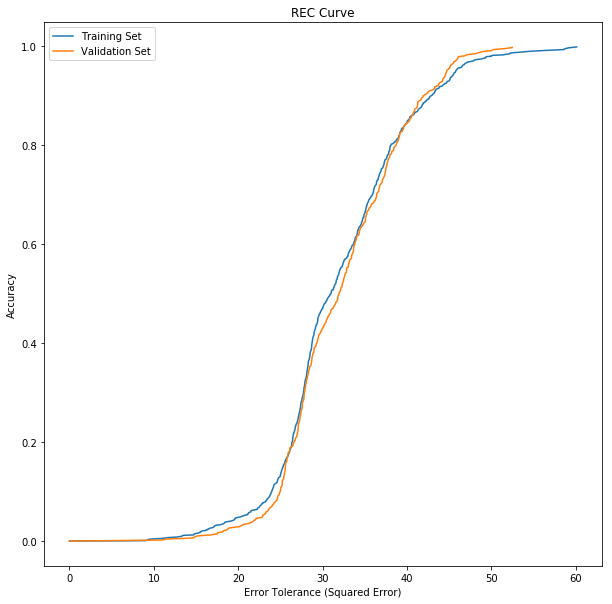

In [268]:
plt.figure(figsize = (10,10))
plt.subplot(1,1,1)
plotREC(Xtrain, ytrain, w3, "Training Set")
plotREC(Xvalid, yvalid, w3, "Validation Set")
plt.xlabel("Error Tolerance (Squared Error)")
plt.ylabel("Accuracy")
plt.legend(loc = "upper left")
plt.title("REC Curve")

## Part 3:  weight vector analysis

As we discussed in class, the magnitude of the weight vector can be interpreted as a measure of feature importance.
Train a ridge regression classifier on a subset of the dataset that you reserved for training.
We will explore the relationship between the magnitude of weight vector components and their relevance to the classification task in several ways.
Each feature is associated with a component of the weight vector.  It can also be associated with the correlation of that feature with the vector of labels.
As we discussed in class, the magnitude of the weight vector can give an indication of feature relevance; another measure of relevance of a feature is its correlation with the labels.  To compare the two, 
create a scatter plot of weight vector components against the [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient) of the corresponding feature with the labels (again, you can use Numpy to compute it).
What can you conclude from this plot?
The paper ranks features according to their importance using a different approach.  Compare your results with what they obtain.

Next, perform the following experiment:
Incrementally remove the feature with the lowest absolute value of the weight vector and retrain the ridge regression classifier.
Plot RMSE as a function of the number of features that remain on the test set which you have set aside and comment on the results.


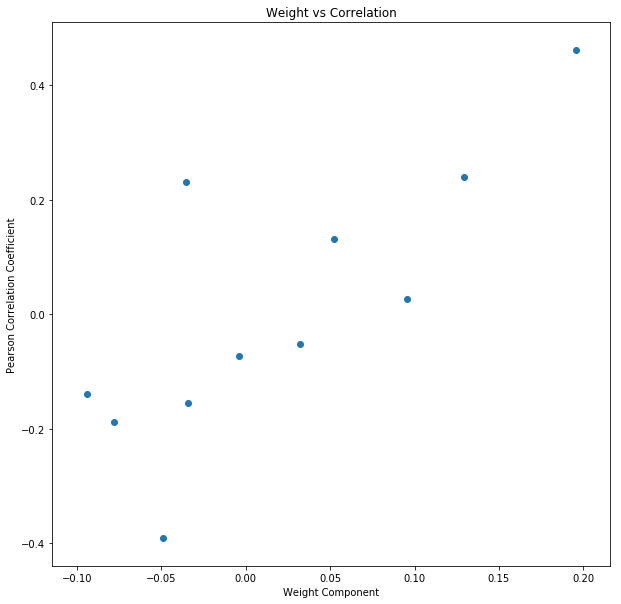

In [275]:
# First - train classifier
Xtrain = X[trainIndices, :]
ytrain = y[trainIndices]
Xvalid = X[testIndices, :]
yvalid = y[testIndices]
ridge2 = RidgeRegression(lmbda = 1000)
w2 = ridge2.fit(Xtrain, ytrain)

# find correlation between features and label.
corr = []
for i in range(len(Xtrain[1])):
    feature = Xtrain[:, i]
    # calc correlation 
    corr.append(np.corrcoef(feature, ytrain)[1,0])

# Plot
plt.figure(figsize = (10,10))
plt.subplot(1,1,1)
plt.xlabel("Weight Component")
plt.ylabel("Pearson Correlation Coefficient")
plt.title("Weight vs Correlation")
plt.scatter(w2, corr)

Keeo removing features with lowest absolute weight and retrain and calculate RMSE with test set.

In [303]:
feat = []
rmsevals = []
X = Xy[:, 0:-1]
X = standardize(X)
y = Xy[:, -1]
rows = np.arange(nRows)
np.random.shuffle(rows)

trainIndices = rows[:nTrain]
testIndices = rows[nTrain:]

Xtrain = X[trainIndices, :]
ytrain = y[trainIndices]
Xvalid = X[testIndices, :]
yvalid = y[testIndices]
w2 = ridge2.fit(Xtrain, ytrain)
while(len(w2) != 1):
    feat.append(len(w2))
    rm = ridge2.rmse(Xvalid, yvalid, w2)
    rmsevals.append(rm)
    # Remove feature with least weight from everything. 
    w2 = np.absolute(w2)
    index = np.argmin(w2)
    # Standardize input data
    X = standardize(X)

    # Remove column index from X
    X = np.delete(X, index, 1)
    # Split into training (70 %) and validation data (30 %).
    nRows = X.shape[0]
    nTrain = int(round(0.7*nRows)) 
    nTest = nRows - nTrain

    # Shuffle row numbers
    rows = np.arange(nRows)
    np.random.shuffle(rows)

    trainIndices = rows[:nTrain]
    testIndices = rows[nTrain:]

    Xtrain = X[trainIndices, :]
    ytrain = y[trainIndices]
    Xvalid = X[testIndices, :]
    yvalid = y[testIndices]
    w2 = ridge2.fit(Xtrain, ytrain)

Text(0.5,1,'RMSE with Removal of Low-Impact Features')

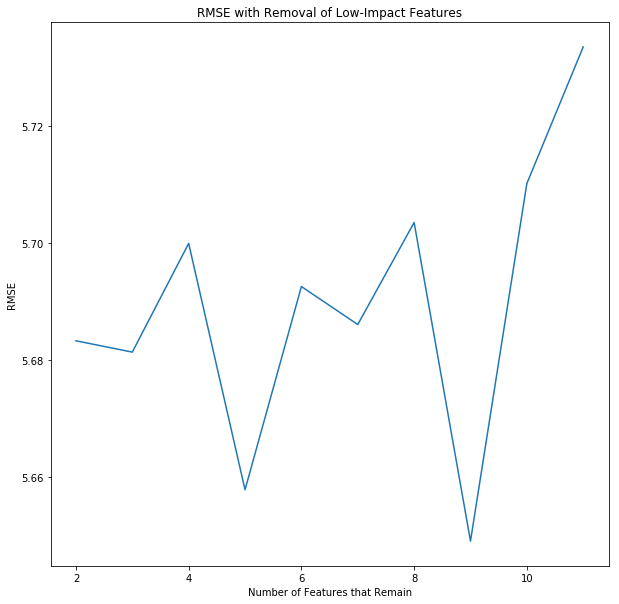

In [304]:
plt.figure(figsize = (10,10))
plt.subplot(1,1,1)
plt.plot(feat, rmsevals)
plt.xlabel("Number of Features that Remain")
plt.ylabel("RMSE")
plt.title("RMSE with Removal of Low-Impact Features")

### Your Report

Answer the questions in the cells reserved for that purpose.

Mathematical equations should be written as LaTex equations; the assignment contains multiple examples of both inline formulas (such as the one exemplifying the notation for the norm of a vector $||\mathbf{x}||$ and those that appear on separate lines, e.g.:

$$
||\mathbf{x}|| = \sqrt{\mathbf{x}^T \mathbf{x}}.
$$



### Submission

Submit your report as a Jupyter notebook via Canvas.  Running the notebook should generate all the plots and results in your notebook.


### Grading 

Here is what the grade sheet will look like for this assignment.  A few general guidelines for this and future assignments in the course:

  * Your answers should be concise and to the point.  We will take off points if that is not the case.
  * Always provide a description of the method you used to produce a given result in sufficient detail such that the reader can reproduce your results on the basis of the description.  You can use a few lines of python code or pseudo-code.


Grading sheet for the assignment:

```
Part 1:  50 points.
(15 points):  Ridge regression is correctly implemented.
(15 points):  Plots of RMSE as a function of lambda are generated correctly.
(20 points):  Discussion of the results

Part 2:  25 points.
(15 points):  REC curves are generated correctly
(10 points):  discussion of REC curves

Part 3:  25 points.
(20 points):  Weight vector analysis
( 5 points):  Comparison to the published results
```


Grading will be based on the following criteria:

  * Correctness of answers to math problems
  * Math is formatted as LaTex equations
  * Correct behavior of the required code
  * Easy to understand plots 
  * Overall readability and organization of the notebook
  * Effort in making interesting observations where requested.
  * Conciseness.  Points may be taken off if the notebook is overly 
  